# Import Libraries

In [1]:
# !pip install feature_engine

In [108]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer

from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer
)

from feature_engine.outliers import Winsorizer

from feature_engine.datetime import DatetimeFeatures
from feature_engine.encoding import (
    RareLabelEncoder,
    MeanEncoder,
    CountFrequencyEncoder
)

import matplotlib.pyplot as plt
import warnings

# Display options

In [16]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output = "pandas")

warnings.filterwarnings("ignore")

# Read_data

In [17]:
# !pip install --upgrade pandas

In [18]:
# path = r"/content/train.csv"

train = pd.read_csv(r"G:\My Drive\Personal Projects\1. Flight prediction system\data\train.csv")


In [19]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Vistara,2019-04-21,Banglore,Delhi,11:30:00,14:20:00,170,0.0,No Info,5403
1,GoAir,2019-04-01,Kolkata,Banglore,16:40:00,00:15:00,455,1.0,No Info,5171
2,IndiGo,2019-04-15,Kolkata,Banglore,15:30:00,18:05:00,155,0.0,No Info,4174
3,Jet Airways,2019-03-27,Delhi,Cochin,19:10:00,19:45:00,1475,2.0,In-flight meal not included,8834
4,Air India,2019-03-03,Banglore,New Delhi,06:10:00,08:55:00,165,0.0,No Info,7591


In [20]:
# print(train.index)

# train.reset_index(drop = True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [22]:
x_train = train.drop(columns = "price")
y_train = train.price.copy()

# Transformation operations

## Airline

In [23]:
x_train.airline

0                Vistara
1                  GoAir
2                 IndiGo
3            Jet Airways
4              Air India
             ...        
635            Air India
636          Jet Airways
637    Multiple carriers
638    Multiple carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [24]:
air_transformer = Pipeline( steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("grouper", RareLabelEncoder(tol = 0.1, replace_with = "other", n_categories = 2)),
    ("encoder", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"))
]
)

air_transformer.fit_transform(x_train.loc[:, ["airline"]])

,airline_Air India,airline_IndiGo,airline_Jet Airways,airline_Multiple carriers,airline_other
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
635,1.0,0.0,0.0,0.0,0.0
636,0.0,0.0,1.0,0.0,0.0
637,0.0,0.0,0.0,1.0,0.0
638,0.0,0.0,0.0,1.0,0.0


# Date of Journey

In [25]:
x_train.date_of_journey

0      2019-04-21
1      2019-04-01
2      2019-04-15
3      2019-03-27
4      2019-03-03
          ...    
635    2019-03-03
636    2019-06-06
637    2019-06-01
638    2019-03-27
639    2019-03-09
Name: date_of_journey, Length: 640, dtype: object

In [26]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline( steps = [
    ("dt", DatetimeFeatures(features_to_extract = feature_to_extract, yearfirst = True, format = "mixed")),
    ("Scaler", MinMaxScaler())
]
)

doj_transformer.fit_transform(x_train.loc[:, ["date_of_journey"]])



,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.333333,0.411765,1.000000,0.432203
1,0.333333,0.294118,0.000000,0.262712
2,0.333333,0.411765,0.000000,0.381356
3,0.000000,0.235294,0.333333,0.220339
4,0.000000,0.000000,1.000000,0.016949
...,...,...,...,...
635,0.000000,0.000000,1.000000,0.016949
636,1.000000,0.823529,0.500000,0.822034
637,1.000000,0.764706,0.833333,0.779661
638,0.000000,0.235294,0.333333,0.220339


# Source and destination

In [27]:
print(x_train.source, x_train.destination)

0      Banglore
1       Kolkata
2       Kolkata
3         Delhi
4      Banglore
         ...   
635      Mumbai
636     Kolkata
637       Delhi
638       Delhi
639       Delhi
Name: source, Length: 640, dtype: object 0          Delhi
1       Banglore
2       Banglore
3         Cochin
4      New Delhi
         ...    
635    Hyderabad
636     Banglore
637       Cochin
638       Cochin
639       Cochin
Name: destination, Length: 640, dtype: object


In [28]:
location_subset = x_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Banglore,Delhi
1,Kolkata,Banglore
2,Kolkata,Banglore
3,Delhi,Cochin
4,Banglore,New Delhi
...,...,...
635,Mumbai,Hyderabad
636,Kolkata,Banglore
637,Delhi,Cochin
638,Delhi,Cochin


In [29]:
location_pipe1 = Pipeline( steps = [
    ("grouper", RareLabelEncoder(tol = 0.1, replace_with = "other", n_categories = 2)),
    ("encoder", MeanEncoder()),
    ("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-1.194179,-1.696872
1,-0.091122,-0.088366
2,-0.091122,-0.088366
3,0.986831,0.986759
4,-1.194179,-1.211369
...,...,...
635,-1.704171,-1.211369
636,-0.091122,-0.088366
637,0.986831,0.986759
638,0.986831,0.986759


In [30]:
np.union1d(
    x_train.source.unique(),
    x_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [31]:
def is_north(x):
    columns = x.columns.to_list()
    north_cities = ["Delhi", "Mumbai", "Kolkata", "New Delhi"]
    return(
        x
        .assign(**{
            f"{col}_is_north": x.loc[:,col].isin(north_cities).astype(int)
            for col in columns
        })
        .drop(columns = columns)
    )

FunctionTransformer(func = is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
635,1,0
636,1,0
637,1,0
638,1,0


In [32]:
location_transformer = FeatureUnion( transformer_list =[
    ("part1", location_pipe1),
    ("part2", FunctionTransformer(func = is_north))
]
)

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-1.194179,-1.696872,0,1
1,-0.091122,-0.088366,1,0
2,-0.091122,-0.088366,1,0
3,0.986831,0.986759,1,0
4,-1.194179,-1.211369,0,1
...,...,...,...,...
635,-1.704171,-1.211369,1,0
636,-0.091122,-0.088366,1,0
637,0.986831,0.986759,1,0
638,0.986831,0.986759,1,0


## dep_time and arrival_time

In [33]:
x_train.dep_time

0      11:30:00
1      16:40:00
2      15:30:00
3      19:10:00
4      06:10:00
         ...   
635    21:05:00
636    09:35:00
637    08:45:00
638    07:30:00
639    05:25:00
Name: dep_time, Length: 640, dtype: object

In [34]:

time_subset = x_train.loc[:, ["dep_time", "arrival_time"]]


In [35]:
time_pipe1 = Pipeline( steps = [
    ("dt", DatetimeFeatures(features_to_extract = ["hour", "minute"])),
    ("scaler", MinMaxScaler())
]
)

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.478261,0.545455,0.608696,0.363636
1,0.695652,0.727273,0.000000,0.272727
2,0.652174,0.545455,0.782609,0.090909
3,0.826087,0.181818,0.826087,0.818182
4,0.260870,0.181818,0.347826,1.000000
...,...,...,...,...
635,0.913043,0.090909,0.956522,0.454545
636,0.391304,0.636364,0.913043,0.090909
637,0.347826,0.818182,0.826087,0.272727
638,0.304348,0.545455,0.826087,0.272727


In [36]:
def part_of_day(x, morning = 4, noon = 12, eve = 16, night= 20):
    columns = x.columns.to_list()
    x_temp = x.assign(**{
        col : pd.to_datetime(x.loc[:, col]).dt.hour
        for col in columns
    })

    return (
        x_temp
        .assign(**{
            f"{col}_part_of_day": np.select(
                [x_temp.loc[:, col].between(morning, noon, inclusive = "left"),
                 x_temp.loc[:, col].between(noon, eve, inclusive = "left"),
                 x_temp.loc[:, col].between(eve, night, inclusive = "left")],
                ["morning", "afternon", "evening"],
                default = "night"
            )for col in columns
        })
        .drop(columns = columns)
    )

FunctionTransformer(func = part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,afternon
1,evening,night
2,afternon,evening
3,evening,evening
4,morning,morning
...,...,...
635,night,night
636,morning,night
637,morning,evening
638,morning,evening


In [37]:
time_pipe2 = Pipeline( steps = [
    ("part", FunctionTransformer(func = part_of_day)),
    ("encoder", CountFrequencyEncoder()),
    ('scaler', MinMaxScaler())
]
)


time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.000000
1,0.253275,0.942529
2,0.000000,0.816092
3,0.253275,0.816092
4,1.000000,1.000000
...,...,...
635,0.091703,0.942529
636,1.000000,0.942529
637,1.000000,0.816092
638,1.000000,0.816092


In [38]:
time_transformer = FeatureUnion(transformer_list = [
    ("part1", time_pipe1),
    ("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.478261,0.545455,0.608696,0.363636,1.000000,0.000000
1,0.695652,0.727273,0.000000,0.272727,0.253275,0.942529
2,0.652174,0.545455,0.782609,0.090909,0.000000,0.816092
3,0.826087,0.181818,0.826087,0.818182,0.253275,0.816092
4,0.260870,0.181818,0.347826,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
635,0.913043,0.090909,0.956522,0.454545,0.091703,0.942529
636,0.391304,0.636364,0.913043,0.090909,1.000000,0.942529
637,0.347826,0.818182,0.826087,0.272727,1.000000,0.816092
638,0.304348,0.545455,0.826087,0.272727,1.000000,0.816092


## Duration

In [89]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [91]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(x_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.0,0.0,0.904837,0.904837
1,0.0,0.0,1.000000,1.000000
2,0.0,0.0,0.904837,0.904837
3,0.0,0.0,0.904837,0.904837
4,0.0,0.0,0.904837,0.904837
...,...,...,...,...
635,0.0,0.0,0.904837,0.904837
636,0.0,0.0,1.000000,1.000000
637,0.0,0.0,1.000000,1.000000
638,0.0,0.0,1.000000,1.000000


In [92]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [93]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [95]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(x_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,3.122263,-0.0973,-0.107932,0.0,0,-0.909348
1,-0.361050,-0.0973,-0.107932,2.0,0,-0.347894
2,-0.361050,-0.0973,-0.107932,0.0,0,-0.938898
3,-0.361050,-0.0973,-0.107932,2.0,1,1.661520
4,2.326592,-0.0973,-0.107932,0.0,0,-0.919198
...,...,...,...,...,...,...
635,-0.361050,-0.0973,-0.107932,0.0,0,-1.086649
636,-0.361050,-0.0973,-0.107932,2.0,0,0.115059
637,-0.361050,-0.0973,-0.107932,2.0,0,-0.003142
638,-0.361050,-0.0973,-0.107932,2.0,0,0.144609


In [82]:
# x_train.duration

In [83]:
# (
#     x_train
#     .duration
#     .quantile([0.25, 0.50, 0.75])
#     .values
#     .reshape(-1, 1)
# )

In [84]:
# class RBFpercentileSimilarity(BaseEstimator, TransformerMixin):
#     def __init__(self, variables = None, percentiles = [0.25, 0.50, 0.75], gamma = 0.1):
#         self.variables = variables
#         self.percentiles = percentiles
#         self.gamma = gamma

#     def fit(self, x, y = None):
#         if not self.variables:
#             self.variables = x.select_dtypes(include = 'number').columns.to_list()

#             self.reference_values_ = {
#                 col: (
#                     x
#                     .loc[:, col]
#                     .quantile(self.percentiles)
#                     .values
#                     .reshape(-1, 1)
#                 )
#                 for col in self.variables
#             }
#             return self

#     def transform(self, x):
#         objects = []
#         for col in self.variables:
#             columns = [f"{col}_rbf_{int(percentile*100)}" for percentile in self.percentiles]
#             obj = pd.DataFrame(
#                     data = rbf_kernel(x.loc[:, [col]], Y = self.reference_values_[col], gamma = self.gamma), columns = columns
#             )
#             objects.append(obj)
#         return pd.concat(objects, axis = 1)

In [85]:
# RBFpercentileSimilarity(percentiles = [0.4, 0.8]).fit_transform(x_train)

In [86]:
# def duration_category(x, short = 180, med = 400):
#     return(
#         x
#         .assign(duration_cat = np.select([x.duration.lt(short), x.duration.between(short, med, inclusive = "left")],
#                                         ["short", "medium"],
#                                         default = "long"))
#         .drop(columns = "duration")
#     )

In [87]:
# def is_over(x, value = 1000):
#     return(
#         x
#         .assign(**{f"duration_over_{value}": x.duration.ge(value).astype(int)})
#         .drop(columns = "duration")
#     )

In [88]:
# duration_pipe1 = Pipeline(steps = [
#     ("rbf", RBFpercentileSimilarity()),
#     ("scaler", PowerTransformer())
# ])

# duration_pipe2 = Pipeline(steps = [
#     ("cat", FunctionTransformer(func = duration_category)),
#     ("encoder", OrdinalEncoder(categories = [["short", "medium", "long"]]))
# ])

# duration_union = FeatureUnion( transformer_list = [
#     ("part1", duration_pipe1),
#     ("part2", duration_pipe2),
#     ("part3", FunctionTransformer(func = is_over)),
#     ("part4", StandardScaler())
# ])

# duration_transformer = Pipeline( steps = [
#     ("outliers", Winsorizer(capping_method = 'iqr', fold = 1.5)),
#     ("imputer", SimpleImputer(strategy = "median")),
#     ("union", duration_union)
# ])

# duration_transformer.fit_transform(x_train.loc[:, ["duration"]])

# Totalstops

In [46]:
x_train.total_stops

0      0.0
1      1.0
2      0.0
3      2.0
4      0.0
      ... 
635    0.0
636    1.0
637    1.0
638    1.0
639    2.0
Name: total_stops, Length: 640, dtype: float64

In [47]:
def is_direct(x):
    return x.assign(is_direct_flight = x.total_stops.eq(0).astype(int))

total_stops_transformer = Pipeline( steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("", FunctionTransformer(func = is_direct))
])


total_stops_transformer.fit_transform(x_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,0.0,1
1,1.0,0
2,0.0,1
3,2.0,0
4,0.0,1
...,...,...
635,0.0,1
636,1.0,0
637,1.0,0
638,1.0,0


# additional_info

In [48]:
x_train.additional_info

0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636    In-flight meal not included
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

In [49]:
info_pipe1 = Pipeline( steps = [
    ("group", RareLabelEncoder(tol = 0.1, n_categories = 2, replace_with = "other")),
    ("encoder", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

info_pipe1.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,1.0,0.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [50]:
def have_info(x):
    return x.assign(additional_info = x.additional_info.ne("No Info").astype(int))

In [51]:
info_union = FeatureUnion(transformer_list = [
    ("part1", info_pipe1),
    ("part2", FunctionTransformer(func = have_info))
])

In [52]:
info_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "unknown")),
    ("union", info_union)
])

In [53]:
info_transformer.fit_transform(x_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,1.0,0.0,0.0,1
4,0.0,1.0,0.0,0
...,...,...,...,...
635,0.0,1.0,0.0,0
636,1.0,0.0,0.0,1
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


# Column Transformer

In [54]:
# column_transformer = ColumnTransformer(transformers = [
#     ("air", air_transformer, ["airline"]),
#     ("doj", doj_transformer, ["date_of_journey"]),
#     ("location", location_transformer, ["source", "destination"]),
#     ("time", time_transformer, ["dep_time", "arrival_time"]),
#     ("dur", duration_transformer, ["duration"]),
#     ("stops", total_stops_transformer, ["total_stops"]),
#     ("info", info_transformer, ["additional_info"])
# ], remainder = "passthrough"
# )

# column_transformer.fit_transform(x_train, y_train)

In [55]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [96]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
    ("duration", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder = "passthrough")

column_transformer.fit_transform(x_train, y_train)

,air__airline_Air India,air__airline_IndiGo,air__airline_Jet Airways,air__airline_Multiple carriers,air__airline_other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,duration__duration_rbf_25,duration__duration_rbf_50,duration__duration_rbf_75,duration__duration_cat,duration__duration_over_1000,duration__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_other,info__additional_info
0,0.0,0.0,0.0,0.0,1.0,0.333333,0.411765,1.000000,0.432203,-1.194179,-1.696872,0,1,0.478261,0.545455,0.608696,0.363636,1.000000,0.000000,3.122263,-0.0973,-0.107932,0.0,0,-0.909348,0.0,1,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,0.333333,0.294118,0.000000,0.262712,-0.091122,-0.088366,1,0,0.695652,0.727273,0.000000,0.272727,0.253275,0.942529,-0.361050,-0.0973,-0.107932,2.0,0,-0.347894,1.0,0,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,0.333333,0.411765,0.000000,0.381356,-0.091122,-0.088366,1,0,0.652174,0.545455,0.782609,0.090909,0.000000,0.816092,-0.361050,-0.0973,-0.107932,0.0,0,-0.938898,0.0,1,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,0.986831,0.986759,1,0,0.826087,0.181818,0.826087,0.818182,0.253275,0.816092,-0.361050,-0.0973,-0.107932,2.0,1,1.661520,2.0,0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.016949,-1.194179,-1.211369,0,1,0.260870,0.181818,0.347826,1.000000,1.000000,1.000000,2.326592,-0.0973,-0.107932,0.0,0,-0.919198,0.0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.016949,-1.704171,-1.211369,1,0,0.913043,0.090909,0.956522,0.454545,0.091703,0.942529,-0.361050,-0.0973,-0.107932,0.0,0,-1.086649,0.0,1,0.0,1.0,0.0,0
636,0.0,0.0,1.0,0.0,0.0,1.000000,0.823529,0.500000,0.822034,-0.091122,-0.088366,1,0,0.391304,0.636364,0.913043,0.090909,1.000000,0.942529,-0.361050,-0.0973,-0.107932,2.0,0,0.115059,1.0,0,1.0,0.0,0.0,1
637,0.0,0.0,0.0,1.0,0.0,1.000000,0.764706,0.833333,0.779661,0.986831,0.986759,1,0,0.347826,0.818182,0.826087,0.272727,1.000000,0.816092,-0.361050,-0.0973,-0.107932,2.0,0,-0.003142,1.0,0,0.0,1.0,0.0,0
638,0.0,0.0,0.0,1.0,0.0,0.000000,0.235294,0.333333,0.220339,0.986831,0.986759,1,0,0.304348,0.545455,0.826087,0.272727,1.000000,0.816092,-0.361050,-0.0973,-0.107932,2.0,0,0.144609,1.0,0,0.0,1.0,0.0,0


In [97]:
# train.columns

# Feature Selection

In [102]:
estimator = RandomForestRegressor(n_estimators = 10, max_depth = 3, random_state = 42)

selector = SelectBySingleFeaturePerformance(
    estimator = estimator,
    scoring = "r2",
    threshold = 0.1
) 
    

# Putting all together

In [103]:
preprocessor = Pipeline( steps = [
    ("ct", column_transformer),
    ("selector", selector)
])

preprocessor.fit_transform(x_train, y_train)

,air__airline_IndiGo,air__airline_Jet Airways,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,duration__duration_rbf_25,duration__duration_cat,duration__duration,stops__total_stops,stops__is_direct_flight
0,0.0,0.0,0.411765,0.432203,-1.194179,-1.696872,3.122263,0.0,-0.909348,0.0,1
1,0.0,0.0,0.294118,0.262712,-0.091122,-0.088366,-0.361050,2.0,-0.347894,1.0,0
2,1.0,0.0,0.411765,0.381356,-0.091122,-0.088366,-0.361050,0.0,-0.938898,0.0,1
3,0.0,1.0,0.235294,0.220339,0.986831,0.986759,-0.361050,2.0,1.661520,2.0,0
4,0.0,0.0,0.000000,0.016949,-1.194179,-1.211369,2.326592,0.0,-0.919198,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.000000,0.016949,-1.704171,-1.211369,-0.361050,0.0,-1.086649,0.0,1
636,0.0,1.0,0.823529,0.822034,-0.091122,-0.088366,-0.361050,2.0,0.115059,1.0,0
637,0.0,0.0,0.764706,0.779661,0.986831,0.986759,-0.361050,2.0,-0.003142,1.0,0
638,0.0,0.0,0.235294,0.220339,0.986831,0.986759,-0.361050,2.0,0.144609,1.0,0


# Visualizations

In [104]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_

feature_performances

{'air__airline_Air India': -0.021450950657751672,
 'air__airline_IndiGo': 0.1393805914976024,
 'air__airline_Jet Airways': 0.17328652466717406,
 'air__airline_Multiple carriers': 0.013407907852869752,
 'air__airline_other': 0.09273495110808243,
 'doj__date_of_journey_month': 0.04250370421741286,
 'doj__date_of_journey_week': 0.15390222809823698,
 'doj__date_of_journey_day_of_week': -0.02719235834228595,
 'doj__date_of_journey_day_of_year': 0.180055461947364,
 'location__source': 0.14704048389487087,
 'location__destination': 0.1531236276729675,
 'location__source_is_north': 0.05903412328748566,
 'location__destination_is_north': 0.05903412328748566,
 'time__dep_time_hour': 0.018900297179436792,
 'time__dep_time_minute': 0.038298819288257256,
 'time__arrival_time_hour': 0.08058022909360729,
 'time__arrival_time_minute': -0.010877683045541117,
 'time__dep_time_part_of_day': -0.00994550332386468,
 'time__arrival_time_part_of_day': 0.004872206917252801,
 'duration__duration_rbf_25': 0.1019

In [105]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key = lambda val: val[1]))

In [106]:
sorted_feat_imp

{'doj__date_of_journey_day_of_week': -0.02719235834228595,
 'duration__duration_rbf_75': -0.024697137172941714,
 'info__additional_info_No Info': -0.02185102966057695,
 'info__additional_info': -0.02185102966057695,
 'air__airline_Air India': -0.021450950657751672,
 'info__additional_info_In-flight meal not included': -0.01720228976945108,
 'duration__duration_rbf_50': -0.012362563586568323,
 'time__arrival_time_minute': -0.010877683045541117,
 'time__dep_time_part_of_day': -0.00994550332386468,
 'time__arrival_time_part_of_day': 0.004872206917252801,
 'air__airline_Multiple carriers': 0.013407907852869752,
 'time__dep_time_hour': 0.018900297179436792,
 'info__additional_info_other': 0.024984962770519054,
 'time__dep_time_minute': 0.038298819288257256,
 'doj__date_of_journey_month': 0.04250370421741286,
 'location__source_is_north': 0.05903412328748566,
 'location__destination_is_north': 0.05903412328748566,
 'time__arrival_time_hour': 0.08058022909360729,
 'air__airline_other': 0.0927

In [120]:
len(sorted_feat_imp)

31

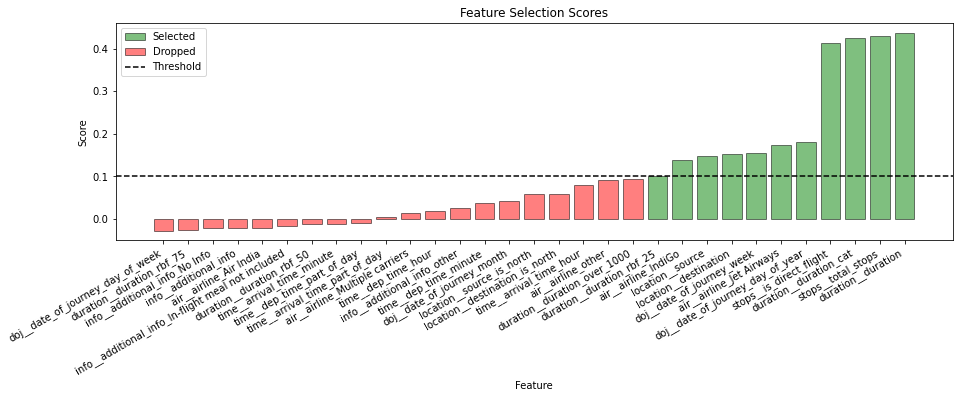

In [119]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
# 	labels=list(sorted_feat_imp.keys()),
# 	rotation=30,
# 	ha="right"
)

ax.set_xticklabels(list(sorted_feat_imp.keys()), rotation = 30, ha = 'right')

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()